# 1. Pandas

- 정의 : 데이터 가공 및 분석을 위해 만들어진 Python 라이브러리
- Pandas라는 이름은 "Panel data"에서 유래함(개량경제학 용어로써 다차원의 구조화된 데이터셋을 다룸)
> balanced panel
![balanced panel](https://wikimedia.org/api/rest_v1/media/math/render/svg/de4ab9449dffb05244e681551e6f3ce710856ac6)
unbalanced panel
![unbalanced panel](https://wikimedia.org/api/rest_v1/media/math/render/svg/fad5580f0bc2deadc1a110b647dded40867600c0)

## 1.1 10 Minute to pandas (http://pandas.pydata.org/pandas-docs/stable/10min.html)
 - Object 생성([Object Creation](http://pandas.pydata.org/pandas-docs/stable/10min.html#object-creation))
 - 데이터 조회([Viewing Data](http://pandas.pydata.org/pandas-docs/stable/10min.html#viewing-data))
 - 데이터 선택([Selection](http://pandas.pydata.org/pandas-docs/stable/10min.html#selection))
     - Selection by Label
     - Selection by Position
     - Boolean Indexing
     - Setting
 - 누락 데이터([Missing Data](http://pandas.pydata.org/pandas-docs/stable/10min.html#missing-data))
 - Pandas 계산([Operations](http://pandas.pydata.org/pandas-docs/stable/10min.html#operations))
     - Stats
     - Apply
     - Histogramming
     - String Methods
 - 병합([Merge](http://pandas.pydata.org/pandas-docs/stable/10min.html#merge))
     - Concat
     - Join
     - Append
 - 그룹화([Grouping](http://pandas.pydata.org/pandas-docs/stable/10min.html#grouping))
 - 변형([Reshaping](http://pandas.pydata.org/pandas-docs/stable/10min.html#reshaping))
     - Stack
     - Pivot Tables
 - 시계열([Time Series](http://pandas.pydata.org/pandas-docs/stable/10min.html#time-series))
 - 분류([Categoricals](http://pandas.pydata.org/pandas-docs/stable/10min.html#categoricals))
 - 피벗([Plotting](http://pandas.pydata.org/pandas-docs/stable/10min.html#plotting))
 - 데이터 입출력([Getting Data in/out](http://pandas.pydata.org/pandas-docs/stable/10min.html#getting-data-in-out))
 - [Gotchas](http://pandas.pydata.org/pandas-docs/stable/10min.html#gotchas)

### 1.1.1 Object 생성

In [10]:
import pandas as pd
import numpy as np
s = pd.Series([1,3,5,np.nan,6,8])
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

### 1.1.2 데이터 조회

#### 1.1.2.1 처음과 끝 조회

In [23]:
df.head()

,A,B,C,D
2013-01-01,1.119708,0.483102,-0.180153,0.101865
2013-01-02,-1.376163,-0.652957,-0.970354,-0.780968
2013-01-03,0.680812,2.514244,0.458267,0.959558
2013-01-04,0.713789,-0.831499,-0.319867,0.489508
2013-01-05,0.304497,-1.900502,-0.405913,-0.317476


In [28]:
df.tail(3)

,A,B,C,D
2013-01-04,0.713789,-0.831499,-0.319867,0.489508
2013-01-05,0.304497,-1.900502,-0.405913,-0.317476
2013-01-06,0.101727,-2.034357,-1.000661,1.020726


#### 1.1.2.2 인덱스, 컬럼, 값 조회

In [30]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [31]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [32]:
df.values

array([[ 1.11970756,  0.48310213, -0.18015284,  0.10186534],
       [-1.37616261, -0.65295705, -0.9703541 , -0.78096833],
       [ 0.68081228,  2.5142443 ,  0.45826721,  0.95955849],
       [ 0.71378907, -0.83149881, -0.31986691,  0.48950839],
       [ 0.30449663, -1.90050208, -0.40591298, -0.31747643],
       [ 0.10172693, -2.03435697, -1.00066125,  1.02072628]])

#### 1.1.2.3 통계 데이터, 변환, 정렬

In [33]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.257395,-0.403661,-0.403113,0.245536
std,0.874771,1.699730,0.543590,0.715766
min,-1.376163,-2.034357,-1.000661,-0.780968
25%,0.152419,-1.633251,-0.829244,-0.212641
50%,0.492654,-0.742228,-0.362890,0.295687
75%,0.705545,0.199087,-0.215081,0.842046
max,1.119708,2.514244,0.458267,1.020726


In [34]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,1.119708,-1.376163,0.680812,0.713789,0.304497,0.101727
B,0.483102,-0.652957,2.514244,-0.831499,-1.900502,-2.034357
C,-0.180153,-0.970354,0.458267,-0.319867,-0.405913,-1.000661
D,0.101865,-0.780968,0.959558,0.489508,-0.317476,1.020726


In [43]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.101865,-0.180153,0.483102,1.119708
2013-01-02,-0.780968,-0.970354,-0.652957,-1.376163
2013-01-03,0.959558,0.458267,2.514244,0.680812
2013-01-04,0.489508,-0.319867,-0.831499,0.713789
2013-01-05,-0.317476,-0.405913,-1.900502,0.304497
2013-01-06,1.020726,-1.000661,-2.034357,0.101727


In [47]:
df.sort_values(by='B')

,A,B,C,D
2013-01-06,0.101727,-2.034357,-1.000661,1.020726
2013-01-05,0.304497,-1.900502,-0.405913,-0.317476
2013-01-04,0.713789,-0.831499,-0.319867,0.489508
2013-01-02,-1.376163,-0.652957,-0.970354,-0.780968
2013-01-01,1.119708,0.483102,-0.180153,0.101865
2013-01-03,0.680812,2.514244,0.458267,0.959558


### 1.1.3 선택
#### 1.1.3.1 List 표현

In [48]:
df['A']

2013-01-01    1.119708
2013-01-02   -1.376163
2013-01-03    0.680812
2013-01-04    0.713789
2013-01-05    0.304497
2013-01-06    0.101727
Freq: D, Name: A, dtype: float64

In [49]:
df[0:3]

,A,B,C,D
2013-01-01,1.119708,0.483102,-0.180153,0.101865
2013-01-02,-1.376163,-0.652957,-0.970354,-0.780968
2013-01-03,0.680812,2.514244,0.458267,0.959558


In [51]:
df['2013-01-02':'2013-01-03']

,A,B,C,D
2013-01-02,-1.376163,-0.652957,-0.970354,-0.780968
2013-01-03,0.680812,2.514244,0.458267,0.959558


#### 1.1.3.2 Label 을 이용한 표현

In [52]:
df.loc[dates[0]]

A    1.119708
B    0.483102
C   -0.180153
D    0.101865
Name: 2013-01-01 00:00:00, dtype: float64

In [54]:
df.loc['2013-01-02']

A   -1.376163
B   -0.652957
C   -0.970354
D   -0.780968
Name: 2013-01-02 00:00:00, dtype: float64

In [58]:
df.loc[:,['A', 'B']]

,A,B
2013-01-01,1.119708,0.483102
2013-01-02,-1.376163,-0.652957
2013-01-03,0.680812,2.514244
2013-01-04,0.713789,-0.831499
2013-01-05,0.304497,-1.900502
2013-01-06,0.101727,-2.034357


In [59]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-1.376163,-0.652957
2013-01-03,0.680812,2.514244
2013-01-04,0.713789,-0.831499


In [62]:
df.loc['20130102',['A','B']]

A   -1.376163
B   -0.652957
Name: 2013-01-02 00:00:00, dtype: float64

In [63]:
df.loc[dates[0],'A']

1.119707557327283

아래가 좀더 빠르다

In [64]:
df.at[dates[0],'A']

1.119707557327283

#### 1.1.3.3 위치를 이용한 표현

In [65]:
df.iloc[3]

A    0.713789
B   -0.831499
C   -0.319867
D    0.489508
Name: 2013-01-04 00:00:00, dtype: float64

In [66]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.713789,-0.831499
2013-01-05,0.304497,-1.900502


In [67]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-1.376163,-0.970354
2013-01-03,0.680812,0.458267
2013-01-05,0.304497,-0.405913


In [68]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-1.376163,-0.652957,-0.970354,-0.780968
2013-01-03,0.680812,2.514244,0.458267,0.959558


In [69]:
 df.iloc[:,1:3]

,B,C
2013-01-01,0.483102,-0.180153
2013-01-02,-0.652957,-0.970354
2013-01-03,2.514244,0.458267
2013-01-04,-0.831499,-0.319867
2013-01-05,-1.900502,-0.405913
2013-01-06,-2.034357,-1.000661


In [70]:
df.iloc[1,1]

-0.65295704945799671

아래가 더 빠르다

In [73]:
df.iat[1,1]

-0.65295704945799671

#### 1.1.3.4 조건식을 이용

In [74]:
df[df.A>0]

,A,B,C,D
2013-01-01,1.119708,0.483102,-0.180153,0.101865
2013-01-03,0.680812,2.514244,0.458267,0.959558
2013-01-04,0.713789,-0.831499,-0.319867,0.489508
2013-01-05,0.304497,-1.900502,-0.405913,-0.317476
2013-01-06,0.101727,-2.034357,-1.000661,1.020726


In [75]:
df[df>0]

,A,B,C,D
2013-01-01,1.119708,0.483102,NaN,0.101865
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,0.680812,2.514244,0.458267,0.959558
2013-01-04,0.713789,NaN,NaN,0.489508
2013-01-05,0.304497,NaN,NaN,NaN
2013-01-06,0.101727,NaN,NaN,1.020726


In [77]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']

In [78]:
df2

,A,B,C,D,E
2013-01-01,1.119708,0.483102,-0.180153,0.101865,one
2013-01-02,-1.376163,-0.652957,-0.970354,-0.780968,one
2013-01-03,0.680812,2.514244,0.458267,0.959558,two
2013-01-04,0.713789,-0.831499,-0.319867,0.489508,three
2013-01-05,0.304497,-1.900502,-0.405913,-0.317476,four
2013-01-06,0.101727,-2.034357,-1.000661,1.020726,three


In [79]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.680812,2.514244,0.458267,0.959558,two
2013-01-05,0.304497,-1.900502,-0.405913,-0.317476,four


#### 1.1.3.5 Setting

In [80]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))

In [81]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [82]:
df['F'] = s1

In [83]:
df.at[dates[0], 'A'] = 0

In [84]:
df.iat[0,1] = 0

In [85]:
df.loc[:,'D'] = np.array([5]* len(df))

In [86]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.180153,5,NaN
2013-01-02,-1.376163,-0.652957,-0.970354,5,1.0
2013-01-03,0.680812,2.514244,0.458267,5,2.0
2013-01-04,0.713789,-0.831499,-0.319867,5,3.0
2013-01-05,0.304497,-1.900502,-0.405913,5,4.0
2013-01-06,0.101727,-2.034357,-1.000661,5,5.0


In [87]:
df2 = df.copy()
df2[df2>0] = -df2

In [88]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.180153,-5,NaN
2013-01-02,-1.376163,-0.652957,-0.970354,-5,-1.0
2013-01-03,-0.680812,-2.514244,-0.458267,-5,-2.0
2013-01-04,-0.713789,-0.831499,-0.319867,-5,-3.0
2013-01-05,-0.304497,-1.900502,-0.405913,-5,-4.0
2013-01-06,-0.101727,-2.034357,-1.000661,-5,-5.0


### 1.1.4 누락 데이터

## 1.2 전체 API 목록

http://pandas.pydata.org/pandas-docs/stable/api.html

### Input/Output
- [read_json([path_or_buf, orient, typ, dtype, ...])](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_json.html#pandas.read_json) : JSON을 Dataframe으로 변경
- [json_normalize(data[, record_path, meta, ...])](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.json.json_normalize.html#pandas.io.json.json_normalize) : semi-structured JSON을 Dataframe으로 변경
- [read_html(io[, match, flavor, header, ...])](http://pandas.pydata.org/pandasdocs/stable/generated/pandas.read_html.html#pandas.read_html) : 

## 1.4 Usage
### 1.4.1 Object 생성
### 1.4.2 Viewing Data

In [ ]:
import pandas as pd
import pandas_datareader.data
import requests
import datetime

In [111]:
CODE='005930.KS'
df = pandas_datareader.data.DataReader(CODE, "yahoo", '2017-02-01', datetime.datetime.now())
df

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-02-01,1977000.0,1983000.0,1952000.0,1956000.0,283000,1956000.0
2017-02-02,1980000.0,1983000.0,1960000.0,1968000.0,300500,1968000.0
2017-02-03,1970000.0,1975000.0,1959000.0,1973000.0,207700,1973000.0
2017-02-06,1979000.0,1983000.0,1957000.0,1978000.0,177200,1978000.0
2017-02-07,1978000.0,1979000.0,1938000.0,1941000.0,280800,1941000.0
2017-02-08,1937000.0,1939000.0,1910000.0,1920000.0,341800,1920000.0
2017-02-09,1939000.0,1942000.0,1911000.0,1920000.0,273800,1920000.0
2017-02-10,1920000.0,1938000.0,1915000.0,1918000.0,220400,1918000.0
2017-02-13,1887000.0,1903000.0,1886000.0,1898000.0,222000,1898000.0


In [112]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [113]:
df.index

DatetimeIndex(['2017-02-01', '2017-02-02', '2017-02-03', '2017-02-06',
               '2017-02-07', '2017-02-08', '2017-02-09', '2017-02-10',
               '2017-02-13', '2017-02-14', '2017-02-15', '2017-02-16',
               '2017-02-17', '2017-02-20', '2017-02-21', '2017-02-22',
               '2017-02-23', '2017-02-24', '2017-02-27', '2017-02-28',
               '2017-03-01', '2017-03-02', '2017-03-03', '2017-03-06',
               '2017-03-07', '2017-03-08', '2017-03-09', '2017-03-10',
               '2017-03-13', '2017-03-14', '2017-03-15', '2017-03-16',
               '2017-03-17', '2017-03-20', '2017-03-21'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [114]:
df.ix[0]

Open         1977000.0
High         1983000.0
Low          1952000.0
Close        1956000.0
Volume        283000.0
Adj Close    1956000.0
Name: 2017-02-01 00:00:00, dtype: float64

In [115]:
df.head(3)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-02-01,1977000.0,1983000.0,1952000.0,1956000.0,283000,1956000.0
2017-02-02,1980000.0,1983000.0,1960000.0,1968000.0,300500,1968000.0
2017-02-03,1970000.0,1975000.0,1959000.0,1973000.0,207700,1973000.0


In [116]:
df.tail(2)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-03-20,2100000.0,2106000.0,2087000.0,2095000.0,205000,2095000.0
2017-03-21,2089000.0,2134000.0,2088000.0,2128000.0,284400,2128000.0


In [120]:
df['2017-02']

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-02-01,1977000.0,1983000.0,1952000.0,1956000.0,283000,1956000.0
2017-02-02,1980000.0,1983000.0,1960000.0,1968000.0,300500,1968000.0
2017-02-03,1970000.0,1975000.0,1959000.0,1973000.0,207700,1973000.0
2017-02-06,1979000.0,1983000.0,1957000.0,1978000.0,177200,1978000.0
2017-02-07,1978000.0,1979000.0,1938000.0,1941000.0,280800,1941000.0
2017-02-08,1937000.0,1939000.0,1910000.0,1920000.0,341800,1920000.0
2017-02-09,1939000.0,1942000.0,1911000.0,1920000.0,273800,1920000.0
2017-02-10,1920000.0,1938000.0,1915000.0,1918000.0,220400,1918000.0
2017-02-13,1887000.0,1903000.0,1886000.0,1898000.0,222000,1898000.0


In [121]:
df['2016-07-01':'2017-12-31']

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-02-01,1977000.0,1983000.0,1952000.0,1956000.0,283000,1956000.0
2017-02-02,1980000.0,1983000.0,1960000.0,1968000.0,300500,1968000.0
2017-02-03,1970000.0,1975000.0,1959000.0,1973000.0,207700,1973000.0
2017-02-06,1979000.0,1983000.0,1957000.0,1978000.0,177200,1978000.0
2017-02-07,1978000.0,1979000.0,1938000.0,1941000.0,280800,1941000.0
2017-02-08,1937000.0,1939000.0,1910000.0,1920000.0,341800,1920000.0
2017-02-09,1939000.0,1942000.0,1911000.0,1920000.0,273800,1920000.0
2017-02-10,1920000.0,1938000.0,1915000.0,1918000.0,220400,1918000.0
2017-02-13,1887000.0,1903000.0,1886000.0,1898000.0,222000,1898000.0


In [122]:
df['2017-01-01':]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-02-01,1977000.0,1983000.0,1952000.0,1956000.0,283000,1956000.0
2017-02-02,1980000.0,1983000.0,1960000.0,1968000.0,300500,1968000.0
2017-02-03,1970000.0,1975000.0,1959000.0,1973000.0,207700,1973000.0
2017-02-06,1979000.0,1983000.0,1957000.0,1978000.0,177200,1978000.0
2017-02-07,1978000.0,1979000.0,1938000.0,1941000.0,280800,1941000.0
2017-02-08,1937000.0,1939000.0,1910000.0,1920000.0,341800,1920000.0
2017-02-09,1939000.0,1942000.0,1911000.0,1920000.0,273800,1920000.0
2017-02-10,1920000.0,1938000.0,1915000.0,1918000.0,220400,1918000.0
2017-02-13,1887000.0,1903000.0,1886000.0,1898000.0,222000,1898000.0


In [123]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,35.000000,3.500000e+01
mean,1.965686e+06,1.987971e+06,1.955257e+06,1.974457e+06,232725.714286,1.974457e+06
std,6.396128e+04,6.656465e+04,6.574520e+04,6.923674e+04,70378.377958,6.923674e+04
min,1.854000e+06,1.898000e+06,1.854000e+06,1.879000e+06,0.000000,1.879000e+06
25%,1.920500e+06,1.938500e+06,1.909000e+06,1.920000e+06,201450.000000,1.920000e+06
50%,1.961000e+06,1.979000e+06,1.951000e+06,1.965000e+06,222000.000000,1.965000e+06
75%,2.000000e+06,2.018500e+06,1.997000e+06,2.010000e+06,281900.000000,2.010000e+06
max,2.100000e+06,2.134000e+06,2.088000e+06,2.128000e+06,424900.000000,2.128000e+06


## 주식 데이터 표현 예제

In [ ]:
import pandas as pd
import pandas_datareader.data
import requests
import datetime
import matplotlib.pyplot as plt

CODE='005930.KS'
df = pandas_datareader.data.DataReader(CODE, "yahoo", '2017-01-01', datetime.datetime.now())

df['MA_5'] = df['Adj Close'].rolling(window=5, center=False).mean()
df['MA_20'] = df['Adj Close'].rolling(window=20, center=False).mean()
df['diff'] = df['MA_5'] - df['MA_20']

<bound method FramePlotMethods.line of <pandas.tools.plotting.FramePlotMethods object at 0x0CF71B50>>

In [ ]:
fig = plt.gcf()
fig.set_size_inches(16,8)

#price(가격)
price_chart = plt.subplot2grid((4,1),(0,0),rowspan=2)
price_chart.plot(df.index, df['Adj Close'], label = 'Adj Close')
price_chart.plot(df.index, df['MA_5'], label = 'MA_5')
price_chart.plot(df.index, df['MA_20'], label = 'MA_20')

plt.title("Samsung 2017")
plt.legend(loc='best')

vol_chart = plt.subplot2grid((4,1),(2,0), rowspan = 1)
vol_chart.bar(df.index, df['Volume'], color = 'c')

signal_chart = plt.subplot2grid((4,1), (3,0), rowspan=1)
signal_chart.plot(df.index, df['diff'].fillna(0), color = 'g')
plt.axhline(y=0, linestyle = '--', color = 'k')

prev_key = prev_val = 0
for key, val in df['diff'][1:].iteritems():
    if val == 0:
        continue
    elif val * prev_val < 0 and val > prev_val:
        print('GOLD', key, val)
        price_chart.annotate('Golden', xy = (key, df['MA_20'][key]), xytext=(10,-30), 
                             textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))        
        signal_chart.annotate('BUY', xy = (key, df['diff'][key]), xytext=(10,-30),
                              textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))        
    elif val * prev_val < 0 and val < prev_val:
        print('DEAD', key, val)
        price_chart.annotate('Dead', xy = (key, df['MA_20'][key]), xytext=(10,30),
                             textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
        signal_chart.annotate('Sell', xy = (key, df['diff'][key]), xytext=(10,30),
                             textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
    prev_key, prev_val = key, val


In [ ]:
plt.show()

In [105]:
import pandas as pd
import pandas_datareader.data
import requests
import datetime
import matplotlib.pyplot as plt

CODE='005930.KS'
df = pandas_datareader.data.DataReader(CODE, "yahoo", '2017-01-01', datetime.datetime.now())

In [106]:
df.tail(3)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-03-17,2090000.0,2125000.0,2086000.0,2120000.0,252000,2120000.0
2017-03-20,2100000.0,2106000.0,2087000.0,2095000.0,205000,2095000.0
2017-03-21,2089000.0,2134000.0,2088000.0,2128000.0,284400,2128000.0


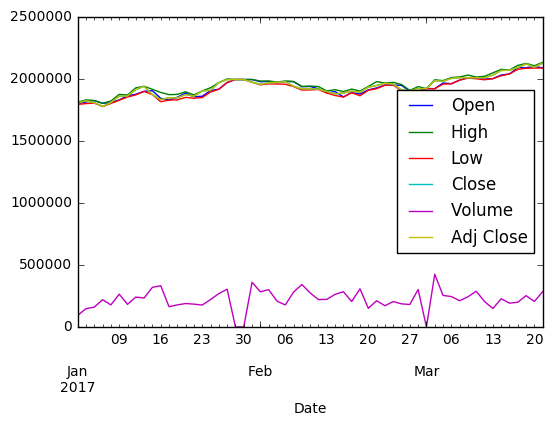

In [109]:
plt.show()

1. Clipboard에 있는것을 pandas형식으로 저장
 - 웹페이지의 단어를 Copy : <a href ="http://www.koreabaseball.com/teamrank/teamrank.aspx"> 야구 순위 </a>

In [ ]:
#df = pd.read_clipboard()

[Object Creation]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

s = pd.Series([1,3,5,np.nan, 6,8])

In [ ]:
s

In [ ]:
data = np.zeros((2,), dtype=[('A', 'i4'),('B', 'f4'),('C', 'a10')])

In [ ]:
data

In [ ]:
data[:] = [(1,2,'hello'), (2,3,'world')]

In [ ]:
data

In [ ]:
pd.DataFrame(data)

In [ ]:
data2 = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]

In [ ]:
pd.DataFrame(data2)

In [ ]:
d = {'one' : [1., 2., 3., ],}

In [ ]:
df = pd.DataFrame(d)

In [ ]:
df

In [ ]:
e = {'one' : [1., 2., 3., 4. ],}

In [ ]:
e = pd.DataFrame(e)

In [ ]:
e

In [ ]:
df.insert(1, 'bar', e)

In [ ]:
df

In [ ]:
df1 = e

In [ ]:
df1.insert(1, 'bar', e)

In [ ]:
df1

In [ ]:
index = pd.date_range('1/1/2000', periods=8)

In [ ]:
df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=list('ABC'))

In [ ]:
index

In [ ]:
df

In [ ]:
df.loc['2000-01-01']

In [ ]:
df

In [ ]:
df.sub(df['A'], axis=0)

In [ ]:
df.info()

In [ ]:
df.A

In [ ]:
midx = pd.MultiIndex(levels=[['one', 'two'], ['x','y']], labels=[[1,1,0,0],[1,0,1,0]])


In [ ]:
midx

In [ ]:
df = pd.DataFrame({'A' : [1, 2, 3, 4], 'B': [5, 6, 7, 8]}, index=midx)


In [ ]:
df

In [ ]:
pn = df.to_panel()

In [ ]:
pn